## Z score for Outlier Detection

### Outliers:

- The outliers may suggest experimental errors, variability in a measurement, or an anomaly. The age of a person may wrongly be recorded as 200 rather than 20 Years. Such an outlier should definitely be discarded from the dataset.

- However, not all outliers are bad. Some outliers signify that data is significantly different from others. For example, it may indicate an anomaly like bank fraud or a rare disease. In this case, outliers are useful for further modelling.

### Significance of outliers:

- Outliers badly affect mean and standard deviation of the dataset. 
- These may statistically give erroneous results.
- Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
- Outliers are highly useful in anomaly detection like fraud detection where the fraud transactions are very different from normal transactions.

#### To use this technique to find outliers, there is a assumption .i.e Column (Feature) should be Normally Distributed.
- Z score tells how many standard deviations away a data point is from the mean.
- Z score is also called standard score.

---------------------------------------------------------------------------------
- Z score = (x -mean) / std. deviation

- [Wikipedia: Z Score](https://en.wikipedia.org/wiki/Standard_score)

#### A normal distribution is shown below and it is estimated that
- 68% of the data points lie between +/- 1 standard deviation.
- 95% of the data points lie between +/- 2 standard deviation
- 99.7% of the data points lie between +/- 3 standard deviation

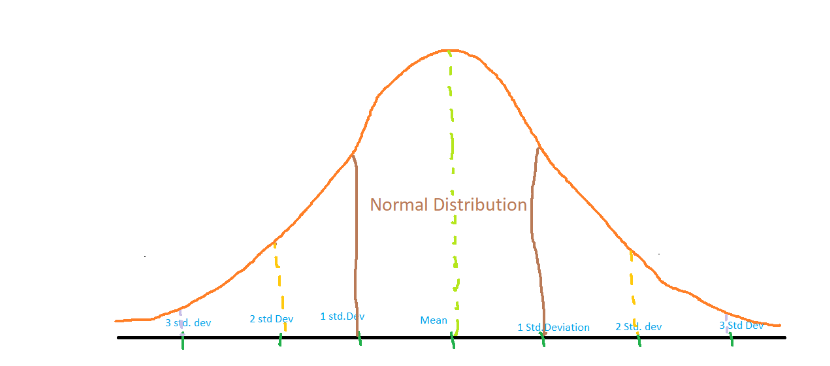

### Z score and Outliers:

- If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
- Means any data point greater than +3 SD and less than -3 SD is a outlier. 
- Note: Feature or column, you are applying this technique to find outliers must be normally dustributed.


### Outlier Treatment:
- After we find outliers in our dataset, this is the time to do some treatment to those outliers.

#### There are 2 important treatment that we can do:
- 1. Trimming: Just remove those outliers from the dataset. But this is not that easy. It totaly depends upon problem we will be dealing with beacause according to problem statement only we can decide wheter outliers are important or not. Also if there are large number of outliers present than trimming those outliers may lead to data thining.



- 2. Capping: Replace outliers with some upper limit and lower limit.

### Let's take toy dataset to illustrate what we have just learned.....

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('placement.csv')

In [9]:
df.shape

(1000, 3)

In [10]:
df.sample(5)

,cgpa,placement_exam_marks,placed
628,7.12,9.0,0
675,6.10,20.0,0
211,7.36,14.0,0
756,7.41,30.0,1
379,7.37,65.0,0


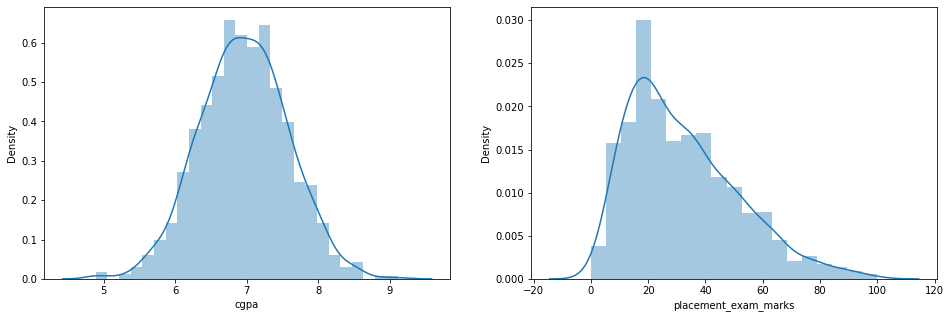

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

- from the above distribution chart, it is clear that cgpa column is normally distributed but placement_exam_marks is right skewed.

- As stated above, we can only use this z-score method with normally distributed column, we are going to use this for cgpa column in this example.

In [14]:
df['placement_exam_marks'].skew()  #placement_exam_marks is right skewed

0.8356419499466834

In [16]:
# statistics of cgpa column
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [18]:
# Finding the boundary values (+ 3 SD abd - 3 SD)
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [19]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Outlier Treatment

### Trimming

In [20]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [21]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [22]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [23]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [24]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [25]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [27]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping

In [28]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [29]:
lower_limit

5.113546374602842

In [30]:
# replacing outliers with upper_limit and lower_limit

df['cgpa'] = np.where(df['cgpa']>upper_limit, upper_limit,
                      
             np.where(df['cgpa']<lower_limit, lower_limit, df['cgpa']))

In [31]:
df.shape

(1000, 4)

In [32]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64